# Лабораторная работа 3: Машина опорных векторов (SVM)

<img src="svm_img.png" width=350>

Результат лабораторной работы — **отчет** в формате ноутбуков IPython (ipynb-файл). Нам не интересен ваш код. Чем меньше кода, тем лучше всем: нам — меньше проверять, вам — проще найти ошибку или дополнить эксперимент.

Постарайтесь сделать ваш отчет интересным рассказом, последовательно отвечающим на вопросы из заданий. Ответы на вопросы должны быть полными, четкими и хорошо аргументированными.

## 1. Квадратичное программирование и QP-солвер

Квадратичное программирование (QP) — специальный тип задач математической оптимизации, заключающийся в нахождении точки минимума неотрицательно-определенной квадратичной формы (многомерная парабола) в присутствии линейных ограничений:
$$
\begin{gather}
    \frac{1}{2}\boldsymbol x^T\boldsymbol P\boldsymbol x + \boldsymbol q^T\boldsymbol x \to \min_{\boldsymbol x} \\
    \begin{aligned}
        \text{s.t.} \quad & \boldsymbol G\boldsymbol x \le \boldsymbol h \\
        & \boldsymbol A\boldsymbol x = \boldsymbol b
    \end{aligned}
\end{gather}
$$

Здесь $\boldsymbol P$ — симметричная матрица. В ограничениях $\boldsymbol G\boldsymbol x \le \boldsymbol h$ и $\boldsymbol A\boldsymbol x = \boldsymbol b$ под знаками равенства и неравенства подразумевается сравнение всех компонент векторов.

Задача квадратичного программирования хорошо изучена, существуют эффективные алгоритмы для ее решения. Имеется множество библиотек с солверами для задачи QP, вот некоторые из них:
 - [CVXOPT](http://cvxopt.org/) (свободно-распространяемая, Python) **рекомендуется к использованию**
 - [Mosek](https://www.mosek.com/) (коммерческая с возможностью получения академической лицензии, C, Java, MATLAB, .NET, R, Python)
 - [Matlab Optimization Toolbox](http://www.mathworks.com/help/optim/ug/quadprog.html) 

#### Задание

1. Установите QP-солвер, разберитесь с его интерфейсом.
2. Протестируйте солвер, решив простую задачу оптимизации в двумерном пространстве:
$$f(\boldsymbol x) = -8x_1 - 16x_2 + x_1^2 + 4x_2^2, \quad \text{s.t.:} \; x_1 + x_2 \leq 5, \; 0 \leq x_1 \leq 3, \; x_2 \geq 0$$
3. Какие из ограничений-неравенств задачи являются _активными_, т.е. влияют на точку оптимума, а какие ограничения можно выбросить и точка оптимума не поменяется?

In [27]:
from cvxopt import matrix, solvers
import numpy as np
solvers.options['show_progress'] = False

In [28]:
Q = matrix(np.array([[2.0, 0.0], [0.0, 8.0]]))
c = matrix(np.array([-8.0, -16.0]))

A = matrix(np.array([[1., 1.], [1., 0.], [-1., 0], [0., -1.]]))
b = matrix(np.array([5., 3., 0., 0.]))

sol = solvers.qp(Q, c, A, b)

print("Оптимальное значение функции:", sol['primal objective'])
print("Оптимальное значение x:", sol['x'])

Оптимальное значение функции: -30.99999280553902
Оптимальное значение x: [ 3.00e+00]
[ 2.00e+00]



In [29]:
Q = matrix(np.array([[2.0, 0.0], [0.0, 8.0]]))
c = matrix(np.array([-8.0, -16.0]))

A = matrix(np.array([[1., 0.], [-1., 0], [0., -1.]]))
b = matrix(np.array([3., 0., 0.]))

sol = solvers.qp(Q, c, A, b)

print("Оптимальное значение функции:", sol['primal objective'])
print("Оптимальное значение x:", sol['x'])

Оптимальное значение функции: -30.999999858273384
Оптимальное значение x: [ 3.00e+00]
[ 2.00e+00]



In [30]:
Q = matrix(np.array([[2.0, 0.0], [0.0, 8.0]]))
c = matrix(np.array([-8.0, -16.0]))

A = matrix(np.array([[1., 1.], [-1., 0], [0., -1.]]))
b = matrix(np.array([5., 0., 0.]))

sol = solvers.qp(Q, c, A, b)

print("Оптимальное значение функции:", sol['primal objective'])
print("Оптимальное значение x:", sol['x'])

Оптимальное значение функции: -31.199999566149053
Оптимальное значение x: [ 3.20e+00]
[ 1.80e+00]



In [31]:
Q = matrix(np.array([[2.0, 0.0], [0.0, 8.0]]))
c = matrix(np.array([-8.0, -16.0]))

A = matrix(np.array([[1., 1.], [1., 0.], [0., -1.]]))
b = matrix(np.array([5., 3., 0.]))

sol = solvers.qp(Q, c, A, b)

print("Оптимальное значение функции:", sol['primal objective'])
print("Оптимальное значение x:", sol['x'])

Оптимальное значение функции: -30.99999778449002
Оптимальное значение x: [ 3.00e+00]
[ 2.00e+00]



И, наконец, 4 условие: x2 >= 0. Ничего опять не поменялось.



In [32]:
Q = matrix(np.array([[2.0, 0.0], [0.0, 8.0]]))
c = matrix(np.array([-8.0, -16.0]))

A = matrix(np.array([[1., 1.], [1., 0.], [-1., 0]]))
b = matrix(np.array([5., 3., 0.]))

sol = solvers.qp(Q, c, A, b)

print("Оптимальное значение функции:", sol['primal objective'])
print("Оптимальное значение x:", sol['x'])

Оптимальное значение функции: -30.99999695228387
Оптимальное значение x: [ 3.00e+00]
[ 2.00e+00]



У нас есть одно активное ограничение: x1 <= 3. Потому что вместо ответа (3, 2) мы получаем в ответе (3.2, 1.8).



## 2. Линейный SVM

Рассмотрим задачу бинарной классификации. Будем обозначать обучающую выборку $\{(\boldsymbol x_n, y_n)\}_{n=1}^N$, где $N$ — количество объектов, $\boldsymbol x_n \in \mathbb{R}^d$ — числовой вектор признакового описания объекта, $y_n \in \{+1, -1\}$ — класс объекта.

Машина опорных векторов обучает модель разделяющей гиперплоскости:
$$f(\boldsymbol x) = \boldsymbol w^T \boldsymbol x + b$$
Параметры модели — вектор весов $\boldsymbol w \in \mathbb{R}^d$ и сдвиг $b \in \mathbb{R}$.

Обучение модели происходит путем решения оптимизационной задачи:
$$
\begin{gather}
    \frac{1}{2} \| \boldsymbol w \|^2 + C \sum_{n=1}^N \xi_n \to \min_{\boldsymbol w, \boldsymbol \xi, b} \\
    \text{s.t.: } \quad y_n (\boldsymbol w^T \boldsymbol x_n + b) \geq 1 - \xi_n, \quad \xi_n \geq 0, \quad \forall n=1,\dots,N
\end{gather}
$$

Ограничения вида $\quad y_n (\boldsymbol w^T \boldsymbol x_n + b) \geq 1$ требуют, чтобы объекты правильно классифицировались разделяющей гиперплоскостью. Поскольку линейная разделимость выборки не гарантируется на практике, вводят переменные $\xi_n$ (slack variables), которые ослабляют ограничения правильной классификации. В оптимизируемом функционале слагаемое $\| \boldsymbol w \|^2$ штрафует малую ширину разделяющей гиперплоскости, сумма $\sum_n \xi_n$ штрафует ослабление ограничений. 

Гиперпараметр $C$ задает баланс между шириной разделяющей полосы и ошибками, допускаемыми классификатором. Обратите внимание, что $C$ фиксируется до обучения и не оптимизируется вместе с параметрами модели.

Гиперпараметр $C$ отвечает за обобщающую способность разделяющей гиперплоскости, высокая обобщающая способность (соотвествующая большому значению $C$) может привести к переобучению, если линейная модель хорошо описывает обучающие примеры. При подборе оптимального параметра $C$ необходимо оценивать качество на отложенной выборке или кросс-валидации. Как правило, для конкретной задачи заранее неизвестно, какой порядок имеет оптимальное значение гиперпараметра $C$, поэтому перебирать значения лучше по логарифмической сетке, например: $10^{-3}, 10^{-2}, \dots, 10^{5}$.

После нахождения решения оптимизационной задачи $(\boldsymbol w_{\star}, \boldsymbol \xi_{\star}, b_{\star})$, часть ограничений становятся _активными_, т.е. переходят в "крайнее положение" — точное равенство:
$$\quad y_n (\boldsymbol w_{\star}^T \boldsymbol x_n + b_{\star}) = 1 - \xi_{\star,n}$$
Объекты, соответствующие активным ограничениям называются _опорными_.

#### Явное преобразование признаков

Разделяющая гиперплоскость — достаточно грубая модель, редко данные могут быть описаны линейной моделью. Линейная неразделимость векторов может быть исправлена путем перехода в другое признаковое пространство, в котором линейная модель лучше описывает данные и, возможно, существует правильно классифицирующая разделяющая гиперплоскость:

$$\boldsymbol x \in \mathbb{R}^d \mapsto \phi(\boldsymbol x) \in \mathbb{R}^t$$

Так, например, добавление всех попарных произведений признаков: $\phi(x_1, \dots, x_d) = (x_1, \dots, x_d, x_1^2, x_1x_2, \dots, x_d^2)$ переводит в пространство, в котором линейная гиперплоскость является квадратичной формой в исходном пространстве и в исходном пространстве признаков разделяющая поверхность может быть, скажем, эллипсом.

[Видеоролик с демонстрацией](https://youtu.be/9NrALgHFwTo)

#### Задание
  1. Сведите задачу обучения линейного SVM к QP, реализуйте процедуру обучения Линейного SVM при помощи QP-солвера.
  2. Сгенерируйте три случайные двумерные выборки для бинарной классификации:
    - с линейно-разделимыми классами
    - с хорошо разделимыми классами, но не линейно
    - с плохо разделимыми классами по имеющимся признакам
  3. Протестируйте линейный SVM на сгенерированных выборках. Покажите на плоскости разделяющую прямую и линии уровня, ограничивающие коридор $f(\boldsymbol x) = \pm 1$. Выделите опорные вектора точками другой формы или большего размера. Постройте классификаторы с различным значением параметра $C$.
  4. Как зависит число опорных векторов от параметра $C$ для различных выборок?
  5. Используя явное преобразование признаков обучите методом опорных векторов квадратичную разделяющую поверхность. Покажите ее на плоскости.

In [33]:
from sklearn.base import BaseEstimator

# Определяем класс LinearSVM

class LinearSVM(BaseEstimator):
    #Конструктор
    def __init__(self, C, transform=None):
        self.C = C
        self.transform = transform
        
    #Обучение SVM    
    def fit(self, X, y):
        #Образцы и признаки
        N, d = X.shape
        if self.transform != None:
            X = np.hstack((X, transform(X)))
            d = X.shape[1]
        #Матрицы для QP    
        P = np.zeros((N + 1 + d, N + 1 + d))
        P[:d,:d] = np.eye(d)
        q = np.hstack(([0.]*(d + 1), [self.C]*N))
        G1 = np.hstack((-y.reshape(N, 1)*X, -y.reshape(N, 1), -np.eye(N)))
        G2 = np.hstack((np.zeros((N, d + 1)), -np.eye(N)))
        G = np.vstack((G1, G2))
        h = np.hstack(([-1.]*N, [0.]*N)) 
        
        #Решение задачи оптимизации и сохранение значений веса, смещения и косинуса
        sol = solvers.qp(matrix(P, tc='d'), matrix(q, tc='d'), matrix(G,  tc='d'), matrix(h,  tc='d'))
        self.weight = np.array(sol['x'][:d]).flatten()
        self.bias = float(np.array(sol['x'][d:d+1]))
        self.cos = np.array(sol['x'][d+1:]).flatten()
        
        #Заполнение массива опорных векторов и их классов
        self.sup_vect = list()
        self.sup_vect_class = list()
        for i in range(N):
            if (np.absolute(y[i] * (self.weight.T.dot(X[i]) + self.bias) - 1) < 1e-6) or (self.cos[i] > 1e-6):
                self.sup_vect.append(X[i])
                self.sup_vect_class.append(y[i])
        self.sup_vect = np.array(self.sup_vect); self.sup_vect_class = np.array(self.sup_vect_class) 
        
    def predict_proba(self, X):
        return (np.dot(X, self.weight) + self.bias).flatten()
            
    def predict(self, X):
        return np.sign(self.predict_proba(X))

In [34]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

In [35]:
def visualize_linear_svm(X, y, C, i, j):
    model = LinearSVM(C)
    model.fit(X, y)

    ax[j][i].scatter(X[:, 0], X[:, 1], s=100, c=y, cmap='winter', edgecolor='black')
    ax[j][i].scatter(model.sup_vect[:, 0], model.sup_vect[:, 1], s=100, marker='o', 
                     c=model.sup_vect_class, cmap='spring', edgecolor='black')

    x1_min = np.min(X[:, 0]) - 1
    x1_max = np.max(X[:, 0]) + 1
    x2_min = np.min(X[:, 1]) - 1
    x2_max = np.max(X[:, 1]) + 1
    
    ax[j][i].set_xlim([x1_min, x1_max])
    ax[j][i].set_ylim([x2_min, x2_max])

    xvals = np.linspace(x1_min, x1_max, 100)
    yvals = np.linspace(x2_min, x2_max, 100)

    xx, yy = np.meshgrid(xvals, yvals)
    zz = np.reshape(model.predict_proba(np.c_[xx.ravel(), yy.ravel()]), xx.shape)
    
    ax[j][i].pcolormesh(xx, yy, zz, cmap='coolwarm', zorder=0, shading='auto')
    ax[j][i].contour(xx, yy, zz, colors=["k", "w", "k"], linestyles=["-", "--", "-"], levels=[-1, 0, 1])

    ax[j][i].text(x1_min + 0.5, x2_max - 0.5, ('Опорных векторов: '+ str(len(model.sup_vect))))

In [36]:
X = [[]]*3; y = [[]]*3
X[0], y[0] = make_classification(n_samples=100, n_features=2, n_redundant=0, n_clusters_per_class=1, random_state=42)
X[1], y[1] = make_classification(n_samples=100, n_features=2, n_redundant=0, n_clusters_per_class=2, random_state=22)
X[2], y[2] = make_classification(n_samples=100, n_features=2, n_redundant=0, n_clusters_per_class=2, random_state=673242893)
X = np.array(X); y = np.array(y)
titles = ["Линейно-разделимая", "Нелинейно разделимая", "Плохо разделимая"]
C = np.array([0.01, 0.1, 1.0, 10])

C:\Users\Миша\AppData\Local\Temp\ipykernel_16688\1449238330.py:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  self.bias = float(np.array(sol['x'][d:d+1]))


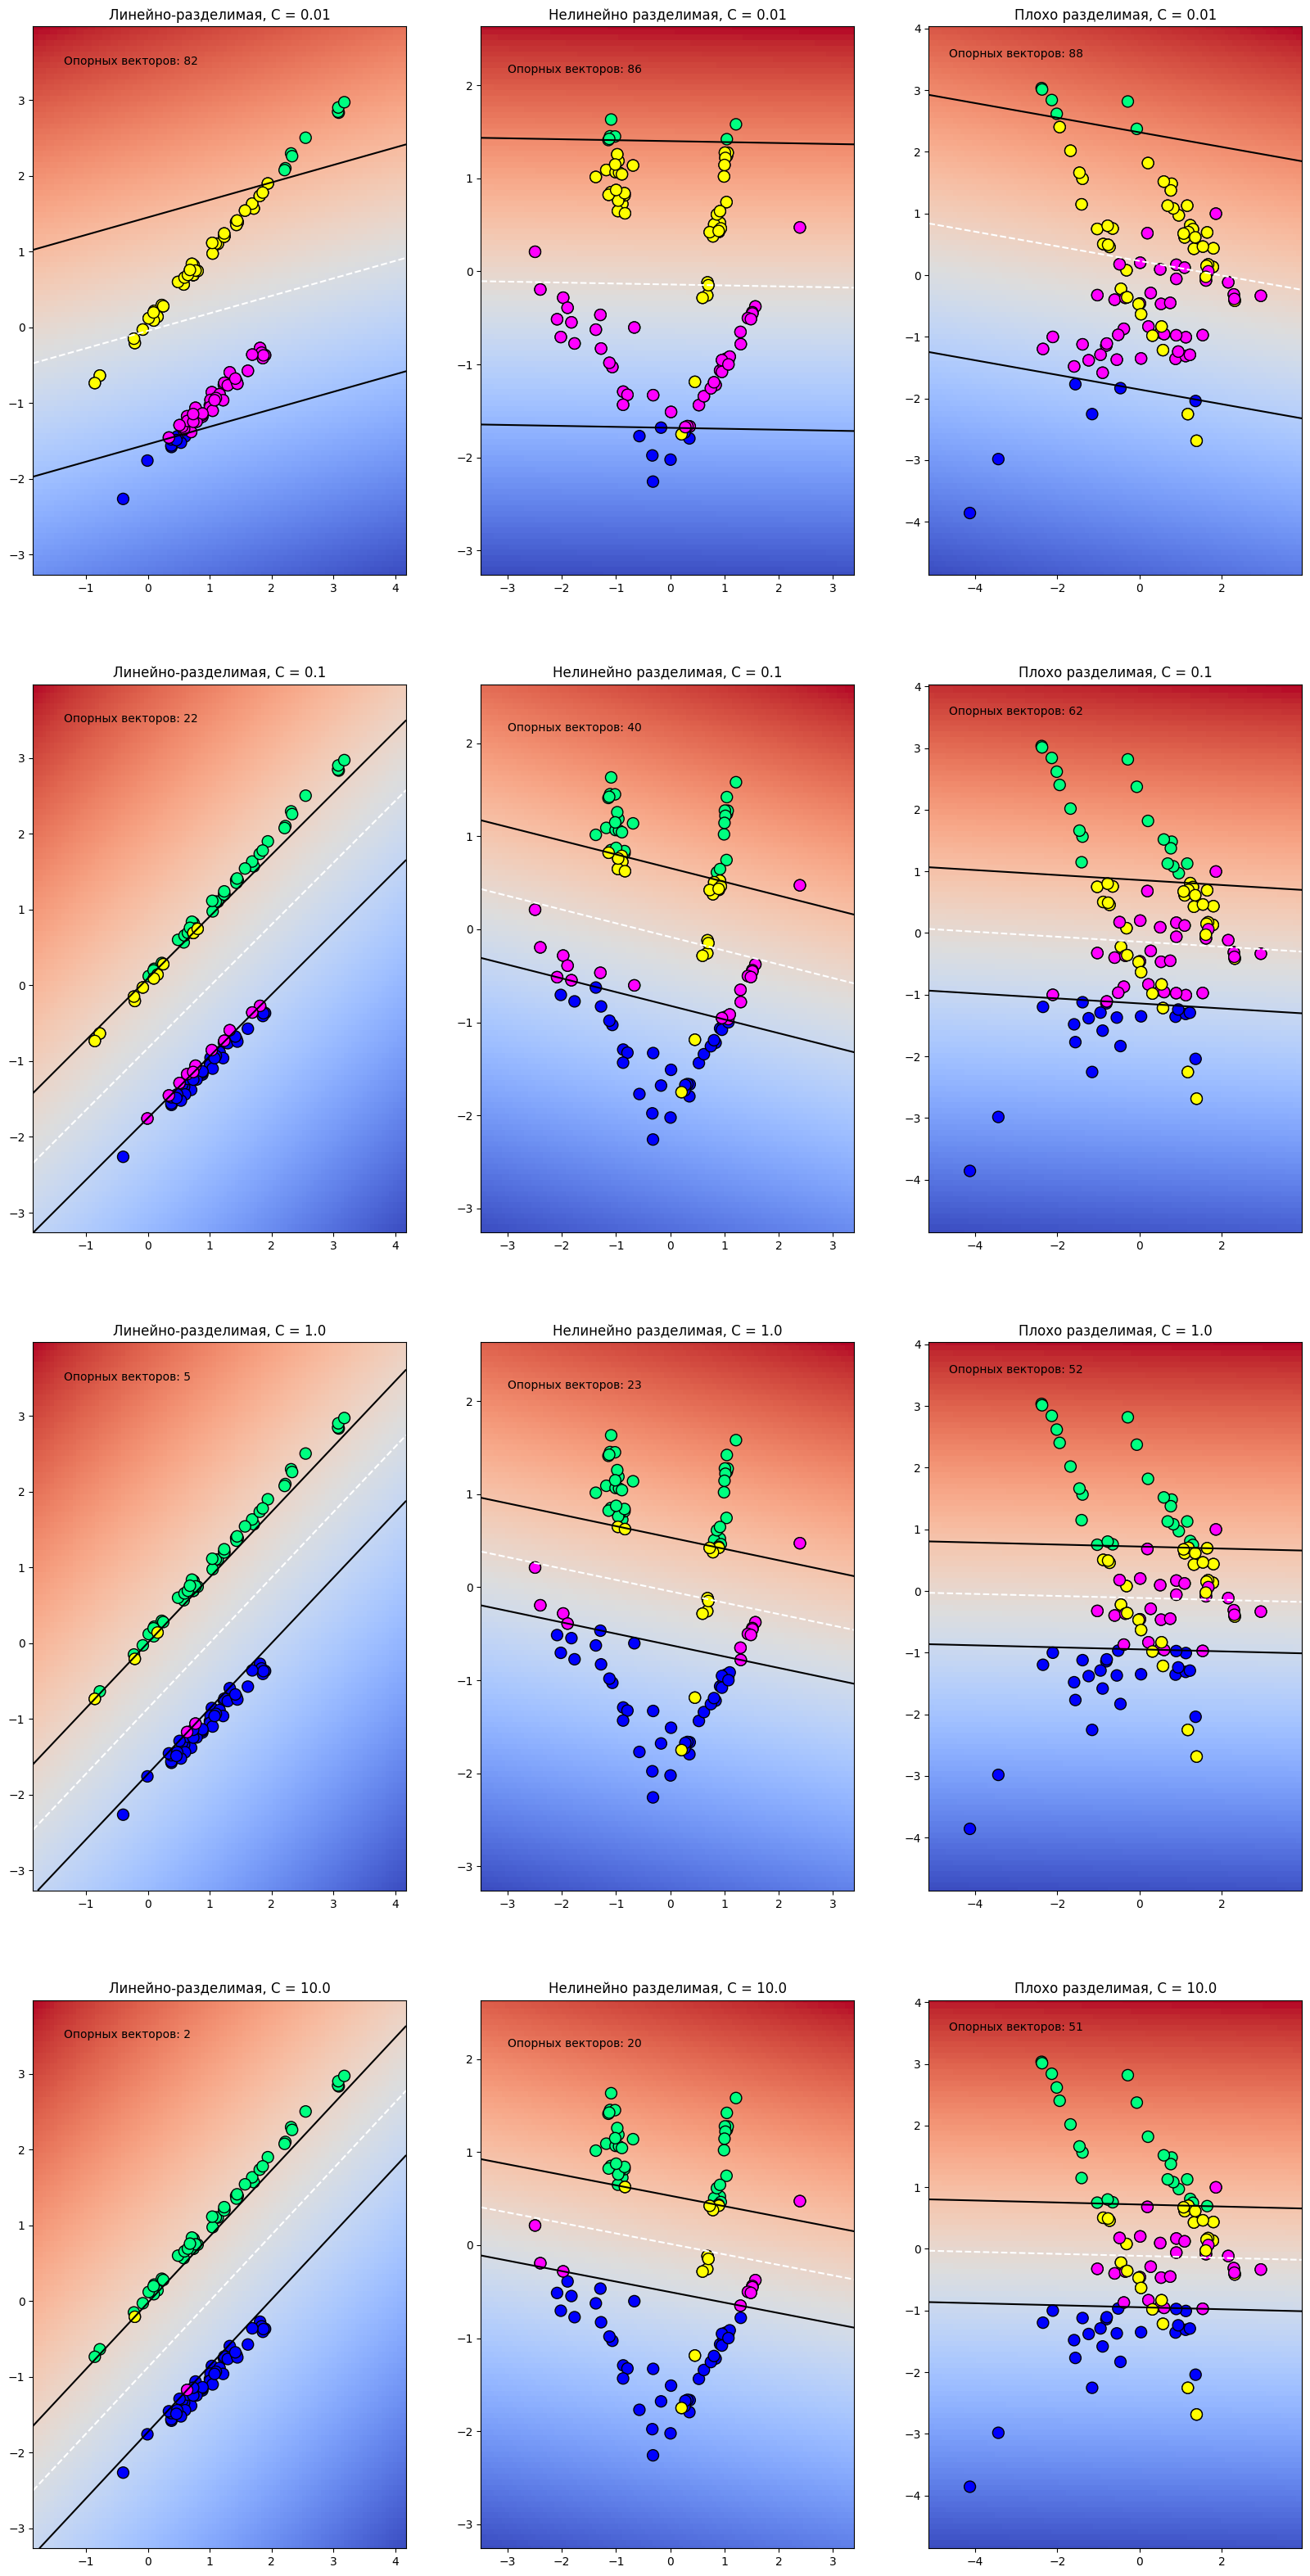

In [37]:
fig, ax = plt.subplots(len(C), 3, figsize=(20,40))
for i in range(3):
    y[i][y[i] == 0] = -1
    for j in range(len(C)):
        visualize_linear_svm(X[i], y[i], C[j], i, j)
        ax[j][i].set_title(titles[i]+', C = '+ str(C[j]))

C ростом числа C число опорных векторов уменьшается, потому что ширина полосы уменьшается тоже.



In [38]:
def transform(X):
    transformed_X = list()
    d = X.shape[1]
    for item in X:
        temp = list()
        for i in range(d):
            for j in range(i, d):
                temp.append(item[i] * item[j])
        transformed_X.append(np.array(temp))
    return np.array(transformed_X)

In [39]:
def visualize_transform_svm(X, y, C, i, j):
    
    model = LinearSVM(C, transform = transform)
    model.fit(X, y)

    ax[j][i].scatter(X[:, 0], X[:, 1], s=60, c=y, cmap='winter', edgecolor='black')
    ax[j][i].scatter(model.sup_vect[:, 0], model.sup_vect[:, 1], s=100, marker='o', 
                     c=model.sup_vect_class, cmap='spring', edgecolor='black')

    x1_min = np.min(X[:, 0]) - 1
    x1_max = np.max(X[:, 0]) + 1
    x2_min = np.min(X[:, 1]) - 1
    x2_max = np.max(X[:, 1]) + 1
    
    ax[j][i].set_xlim([x1_min, x1_max])
    ax[j][i].set_ylim([x2_min, x2_max])

    xvals = np.linspace(x1_min, x1_max, 100)
    yvals = np.linspace(x2_min, x2_max, 100)

    xx, yy = np.meshgrid(xvals, yvals)
    zz = model.weight[2]*xx**2 + model.weight[3]*xx*yy + model.weight[4]*yy**2
    
    ax[j][i].pcolormesh(xx, yy, zz, cmap='coolwarm', zorder=0, shading='auto')
    ax[j][i].contour(xx, yy, zz, colors=["k", "w", "k"], linestyles=["-", "--", "-"], levels=[-1, 0, 1])

C:\Users\Миша\AppData\Local\Temp\ipykernel_16688\1449238330.py:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  self.bias = float(np.array(sol['x'][d:d+1]))


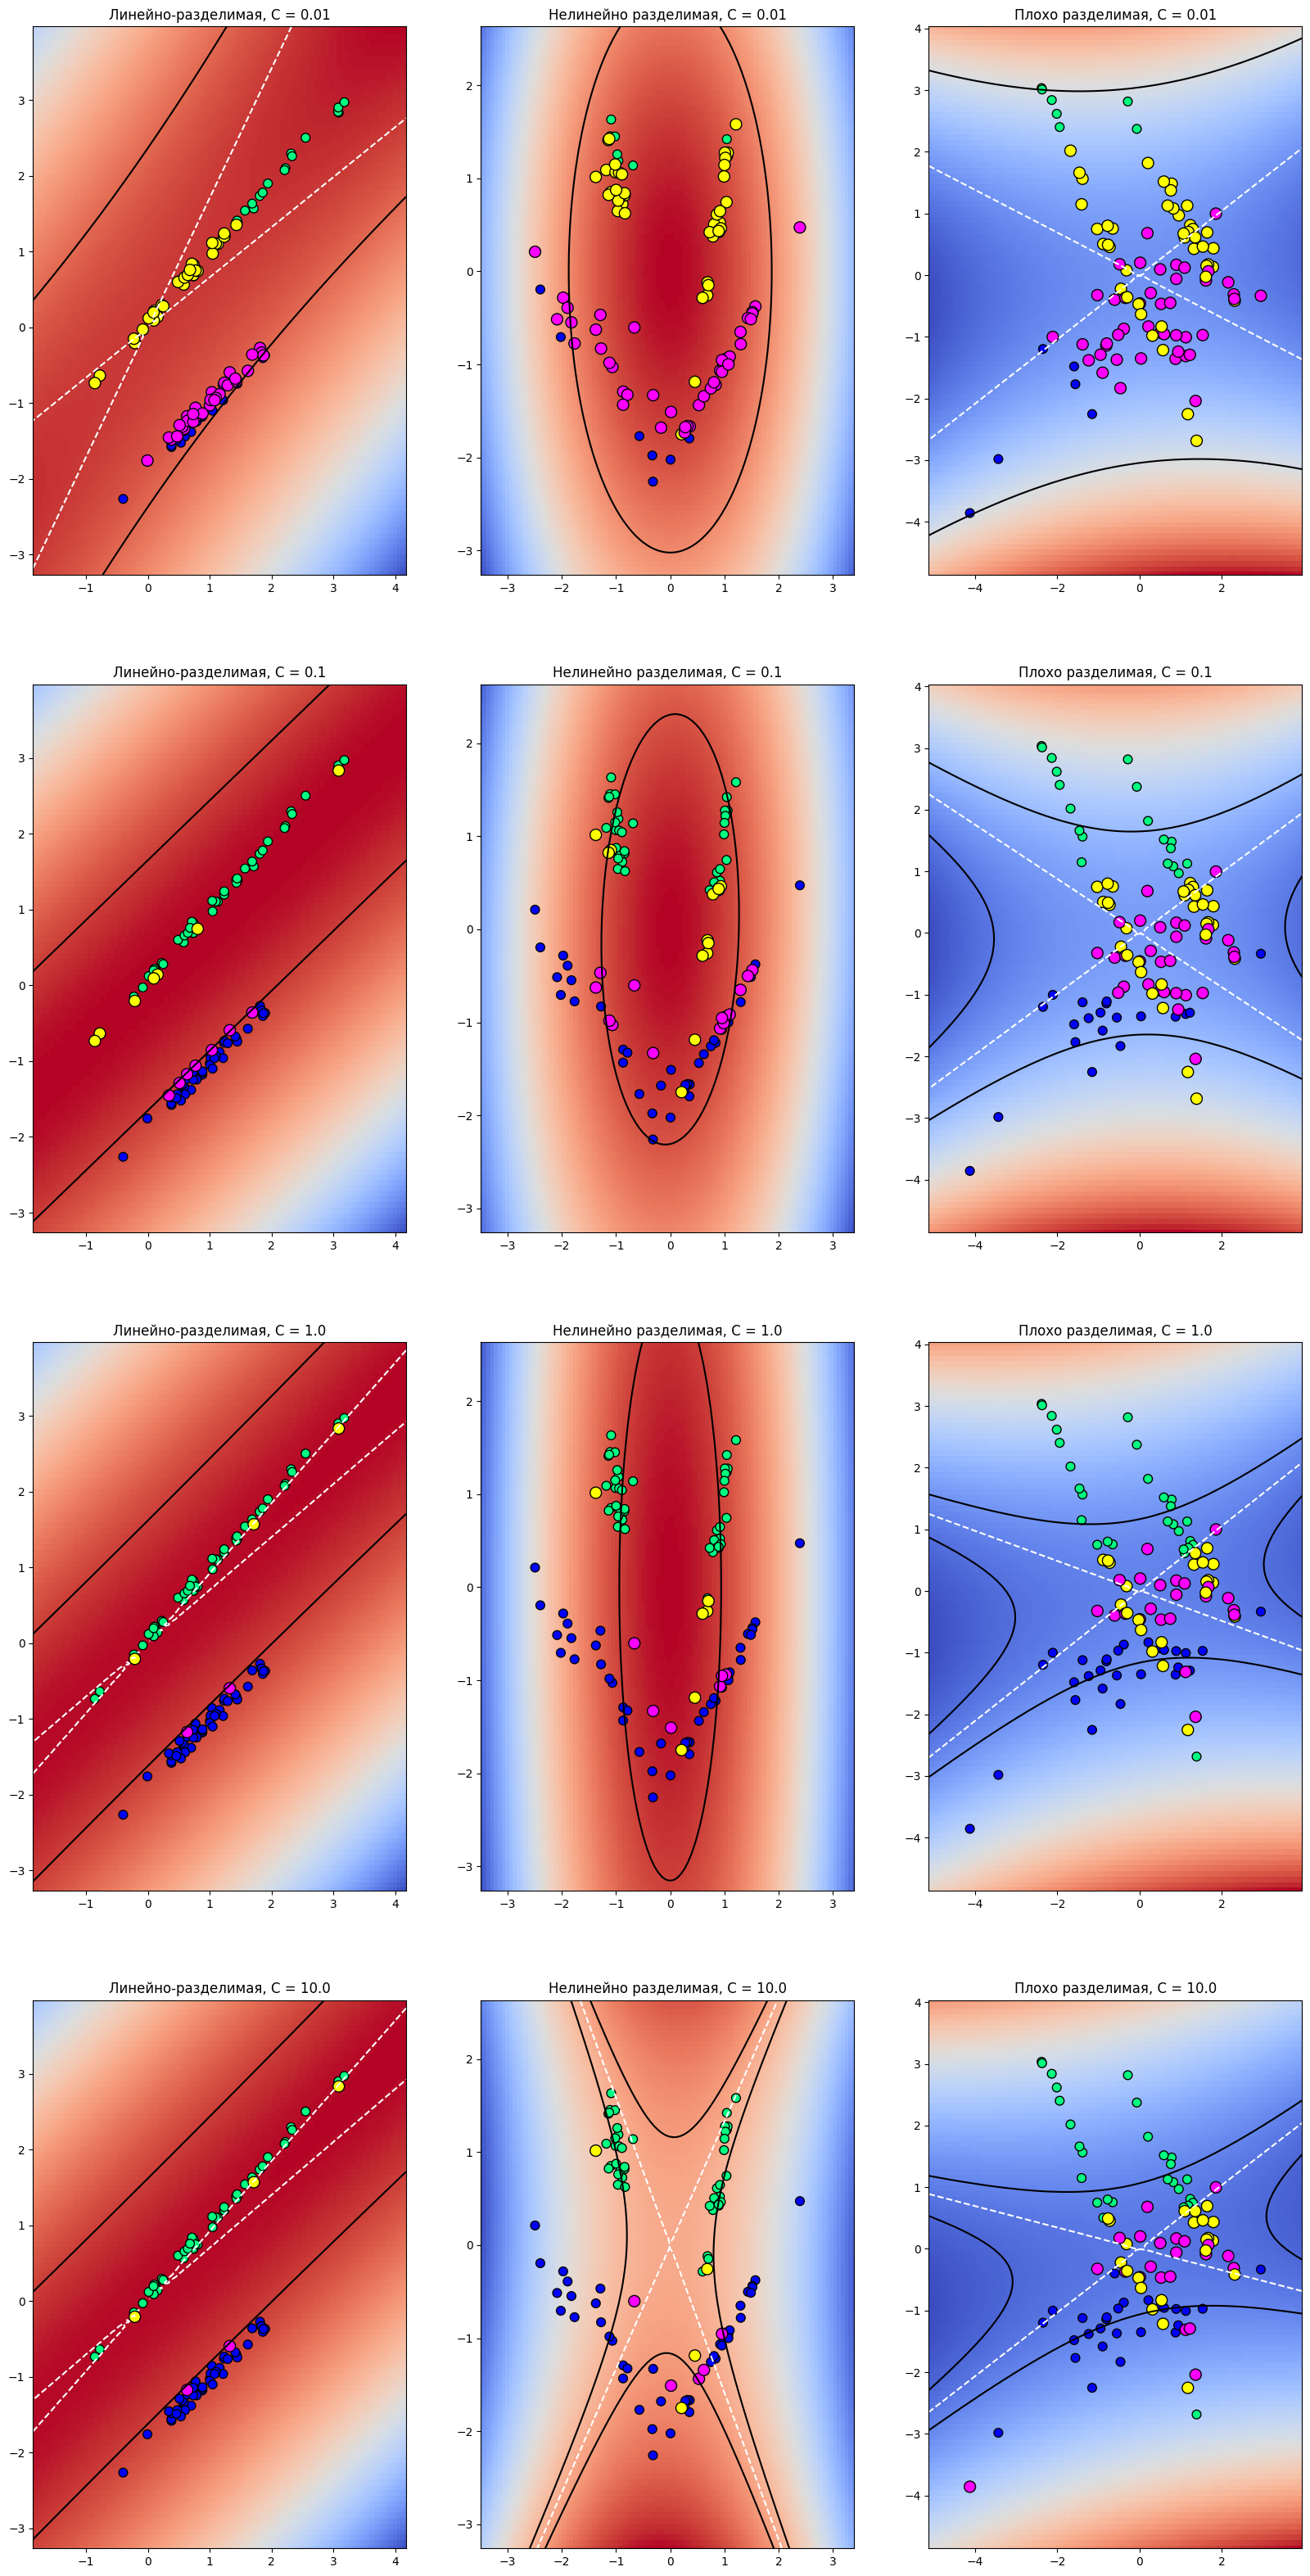

In [40]:
fig, ax = plt.subplots(len(C), 3, figsize=(20,40))
for i in range(3):
    y[i][y[i] == 0] = -1
    for j in range(len(C)):
        visualize_transform_svm(X[i], y[i], C[j], i, j)
        ax[j][i].set_title(titles[i]+', C = '+str(C[j]))

# 3. Двойственный переход и Ядровой SVM

Задачу обучения линейного SVM, рассмотренную в предыдущем пункте принято называть _прямой_ оптимизационной задачей для SVM. Любая задача оптимизации с ограничениями имеет [_двойственную_ задачу Лагранжа](http://goo.gl/OujTPr), в которой оптимизируются _двойственные переменные_ (множители Лагранжа), соответствующие штрафу за нарушение ограничений, максимизируется нижняя оценка функционала прямой задачи. В случае задачи квадратичного программирования, решение двойственной задачи (значение оптимизируемого функционала) совпадает с оптимумом прямой задачи.

Подробнее можно почитать в [статье](./SMAIS11_SVM.pdf).

Двойственная задача для SVM имеет вид:
$$
\begin{gather}
    \sum_{n} \alpha_n - \frac{1}{2}\sum_{n}\sum_{n'} \alpha_{n}\alpha_{n'} y_{n}y_{n'} x_{n}^Tx_{n'} \to \max_{\alpha} \\
    \begin{aligned}
        \text{s.t. } \quad  
        & 0 \le \alpha_n \le C, \quad \forall n = 1, \dots, N \\
        & \sum_{n} \alpha_n y_n = 0
    \end{aligned}
\end{gather}
$$

Оптимизируется вектор из двойственных переменных $\alpha_n$, соответствующих объектам обучающей выборки. Объект $x_n$ является опорным, если $\alpha_n > 0$.

Предсказание вычисляется по следующему правилу:
$$\hat{y}(x) = \text{sign}\left(\sum_{n}\alpha_{n}y_{n}x^Tx_{n} + b\right).$$

Для предсказания необходимо оценить значение $b$. Известно, что для любого опорного объекта, который классифицируется безошибочно верно:
$$y_n = \sum_{n'}\alpha_{n}y_{n}x_{n}^Tx_{n'} + b,$$
значит для любого такого объекта:
$$b = y_n - \sum_{n'}\alpha_{n}y_{n}x_{n}^Tx_{n'}.$$

В случае наличия ошибок классификации обучающей выборки, предлагается усреднять значение $b$ по всем опорным векторам:
$$b = \frac{1}{N_\text{SV}}\sum_{n \in \text{SV}}\left(y_n - \sum_{n'}\alpha_{n}y_{n}x_{n}^Tx_{n'}\right).$$
Интуиция здесь такова, что суммарные ошибки в положительную сторону примерно равны суммарным ошибкам в отрицательную сторону.

Другой вариант — отказаться от параметра $b$ и работать с моделью $f(x) = w^Tx$, добавив к вектору $x$ константный признак.

#### Неявное преобразование признаков
Отметим, что двойственная задача SVM содержит вектора признаков исключительно в виде скалярного произведения $x^Tx'$. Эта особенность позволяет производить неявное преобразование признакового пространства. Вместо вычисления функции $\phi(\boldsymbol x)$, которая может отображать исходные признаки в вектора очень большой размерности, будем вычислять скалярное произведение $k(\boldsymbol x, \boldsymbol x') = \phi(\boldsymbol x)^T\phi(\boldsymbol x')$ называемое _ядром_. 

#### Задание
  1. Реализуйте процедуру обучения ядрового SVM, используя QP-солвер.
  2. Протестируйте на случайных двумерных выборках ядровой SVM. Покажите на плоскости строящиеся разделяющие поверхности, линии уровня, ограничивающие коридор $f(\boldsymbol x) = \pm 1$. Выделите опорные вектора точками другой формы или большего размера. Попробуйте следующие ядровые функции:
    - линейная: $k(x, x') = x^Tx'$
    - полиномиальная: $k(x, x') = (x^Tx' + 1)^p$ с различными степенями $p = 2,3,\dots$
    - Гауссовская-RBF: $k(x, x') = \exp(-\frac{1}{2\gamma}\|x - x'\|^2)$
  3. Как ведет себя SVM с полиномиальным ядром в зависимости от параметров $C$ и степени ядра $p$?
  4. Как ведет себя SVM с RBF-ядром в зависимости от параметров $C$ и $\gamma$? Поварьируйте параметры $C$ и $\gamma$ по логарифмической сетке. Какие значения параметров ведут к переобучению, а какие — к слишком грубой модели?

In [41]:
from sklearn.base import BaseEstimator

class DualSVM(BaseEstimator):
    
    def __init__(self, C=1, kernel="linear", p=None, g=None):
        self.C = C
        self.kernel = kernel
        self.p = p
        self.g = g
        
    def _linear(self, x1, x2):
        return np.dot(x1, x2)
    
    def _poly(self, x1, x2, p):
        return (np.dot(x1, x2) + 1) ** p
        
    def _rbf(self, x1, x2, g):
        nr = np.linalg.norm(x1 - x2) ** 2
        return np.exp((-1/(2*g)) * nr)
    
    def fit(self, X, y):
        M, n = X.shape
        K = np.zeros((M, M))
        for i in range(M):
            for j in range(M):
                if self.kernel == "linear": 
                    K[i, j] = self._linear(X[i], X[j])
                elif self.kernel == "poly": 
                    K[i, j] = self._poly(X[i], X[j], self.p)
                else: 
                    K[i, j] = self._rbf(X[i], X[j], self.g)
        
        P = matrix(np.outer(y, y) * K, tc='d')
        q = matrix(-np.ones(M), tc='d')
        G = matrix(np.vstack((np.eye(M), -np.eye(M))), tc='d')
        h = matrix(np.hstack((self.C * np.ones(M), np.zeros(M))), tc='d')
        A = matrix(y.reshape(1, M), tc='d')  
        b = matrix(0, tc='d')                   
        sol = solvers.qp(P, q, G, h, A, b)
        self.alpha = np.array(sol['x']).flatten()
        
        index = self.alpha > 0.000006
        self.sup_alpha = self.alpha[index]
        self.sup_vect = X[index]
        self.sup_vect_class = y[index]
        
        self.b = []
        for i in range(len(self.sup_vect)):
            temp = 0
            for j in range(len(self.sup_vect)):
                if self.kernel == "linear": 
                    temp += self._linear(self.sup_vect[i], self.sup_vect[j])
                elif self.kernel == "poly": 
                    temp += self._poly(self.sup_vect[i], self.sup_vect[j], self.p)
                else: 
                    temp += self._rbf(self.sup_vect[i], self.sup_vect[j], self.g)
            self.b.append(self.sup_vect_class[i] - self.sup_alpha[i]*self.sup_vect_class[i]*temp)
        self.b = np.array(self.b).mean()
        
    def predict_proba(self, X):
        y_pred = []
        for item in X:
            prediction = 0
            for i in range(len(self.sup_alpha)):
                if self.kernel == "linear":
                    prediction += self.sup_alpha[i] * self.sup_vect_class[i] * self._linear(self.sup_vect[i], item)
                elif self.kernel == "poly":
                    prediction += self.sup_alpha[i] * self.sup_vect_class[i] * self._poly(self.sup_vect[i], item, self.p)
                else:
                    prediction += self.sup_alpha[i] * self.sup_vect_class[i] * self._rbf(self.sup_vect[i], item, self.g)
            prediction += self.b
            y_pred.append(prediction)
        return np.array(y_pred)        
            
    def predict(self, X):
        return np.sign(self.predict_proba(X))

In [42]:
def paint(X, y, C, i, j, tr = None, svm = 'linear', kernel='linear', p=None, g=None):
    if svm == 'linear':
        model = LinearSVM(C, transform = tr)
        model.fit(X, y)
    else:
        model = DualSVM(C = C, kernel = kernel, p = p, g = g)
        model.fit(X, y)

    ax[j][i].scatter(X[:, 0], X[:, 1], s=60, c=y, cmap='autumn', edgecolor='black')
    ax[j][i].scatter(model.sup_vect[:, 0], model.sup_vect[:, 1], s=250, marker='+', 
                     c=model.sup_vect_class, cmap='spring')

    x1_min = np.min(X[:, 0]) - 1
    x1_max = np.max(X[:, 0]) + 1
    x2_min = np.min(X[:, 1]) - 1
    x2_max = np.max(X[:, 1]) + 1
    
    ax[j][i].set_xlim([x1_min, x1_max])
    ax[j][i].set_ylim([x2_min, x2_max])

    xvals = np.linspace(x1_min, x1_max, 100)
    yvals = np.linspace(x2_min, x2_max, 100)

    xx, yy = np.meshgrid(xvals, yvals)
    zz = np.reshape(model.predict_proba(np.c_[xx.ravel(), yy.ravel()]), xx.shape)
    
    ax[j][i].pcolormesh(xx, yy, zz, cmap='coolwarm', zorder=0, shading='auto')
    ax[j][i].contour(xx, yy, zz, colors=["k", "w", "k"], linestyles=["--", "-", "--"], levels=[-1, 0.0001, 1])
    ax[j][i].set_xlabel(f'Опорных векторов: {len(model.sup_vect)}', fontsize = 13)    

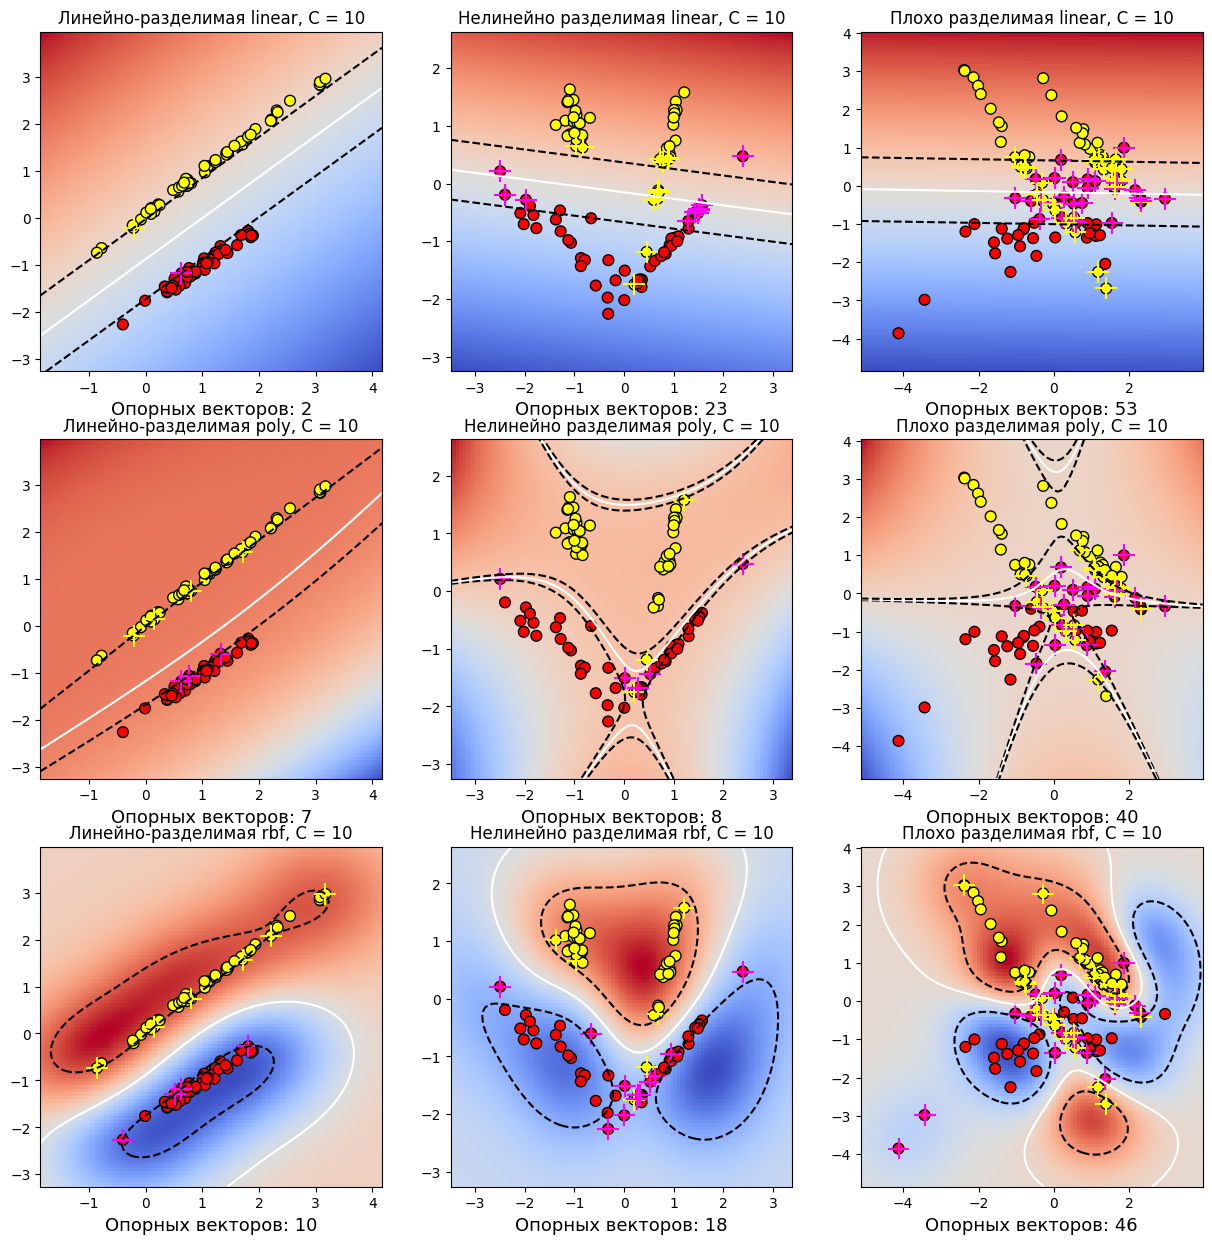

In [43]:
fig, ax = plt.subplots(3, 3, figsize=(15,15))
kernels = ['linear', 'poly', 'rbf']
for i in range(3):
    for j in range(3):
        paint(X[i], y[i], C = 10, i=i, j=j, svm = 'dual', kernel = kernels[j], p = 3, g = 1)
        ax[i][j].set_title(f'{titles[j]} {kernels[i]}, C = {10}')

**Ответ:** при повышении степени полинома границы классов строятся лучше. С влияет на ширину полосы.

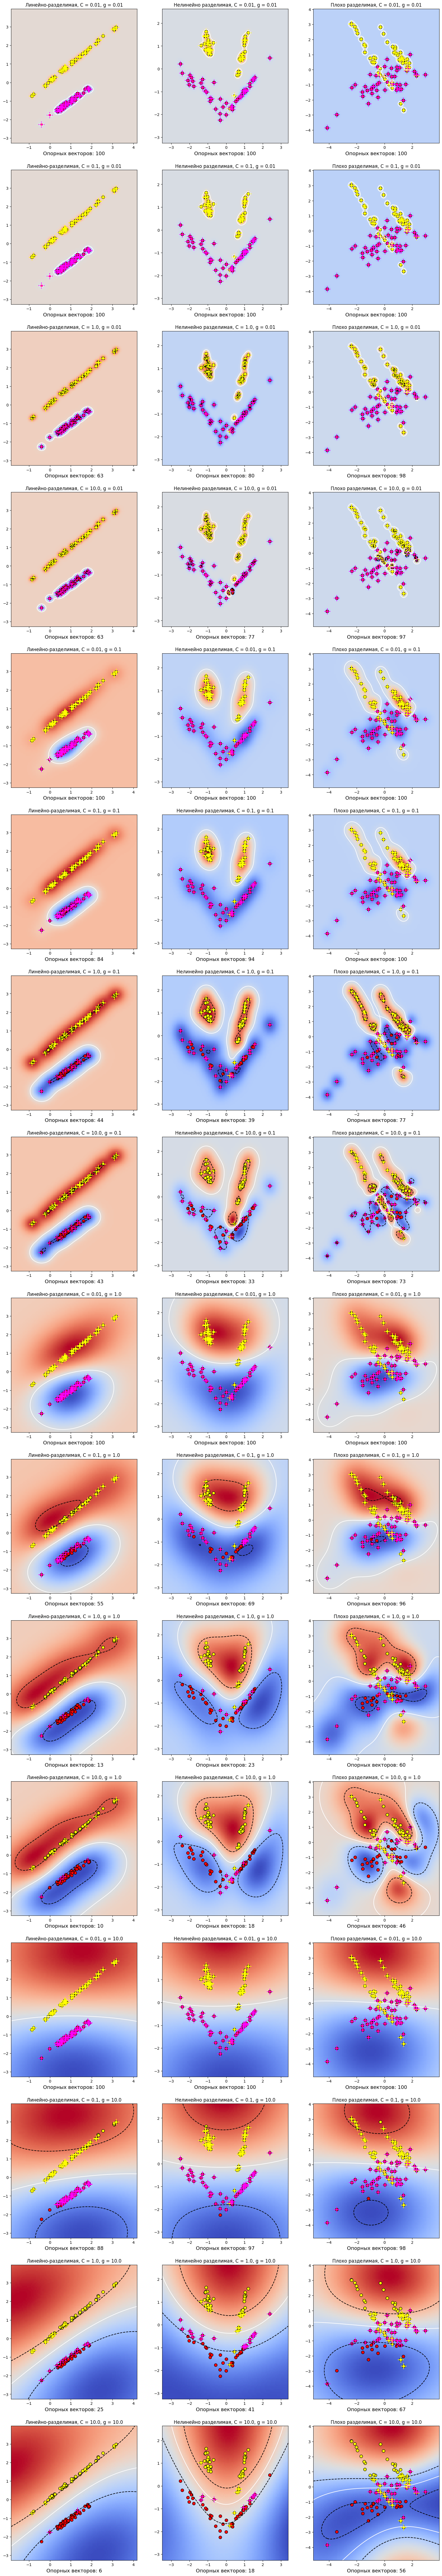

In [46]:
g = [0.01, 0.1, 1, 10]
cvals, gvals = np.meshgrid(C, g)
gg = gvals.flatten()
cc = cvals.flatten()
fig, ax = plt.subplots(len(gg), 3, figsize=(20,120))
for i in range(3):
    for j in range(len(gg)):
        paint(X[i], y[i], cc[j], i, j, svm = 'dual', kernel = 'rbf', g = gg[j])
        ax[j][i].set_title(titles[i] + ', C = ' + str(cc[j]) + ', g = ' + str(gg[j]))

**Ответ:** малые значение параметра C ведёт к грубой модели,а слишком малые гамма - к переобучению.

# Примеры

Настройка вывода графиков [`Maplotlib`](http://matplotlib.org/) и импорт функций из модуля [`pylab`](http://wiki.scipy.org/PyLab).

In [ ]:
%pylab inline

## Визуальное решение задачи квадратичного программирования

На следующем рисунке наглядно показано решение задачи QP из задания 1. Оптимизируемая функция $f(\boldsymbol x)$ показана линиями уровня, область значений недопустимых ограничениями окрашена в серый цвет.

In [ ]:
x1 = linspace(-3, 5, 50)
x2 = linspace(-2, 6, 50)
xx1, xx2 = meshgrid(x1, x2)

f = -8*xx1 - 16*xx2 + xx1**2 + 4*xx2**2
constr1 = (xx1 + xx2 <= 5)
constr2 = (0 <= xx1) & (xx1 <= 3)
constr3 = (xx2 >= 0)

figure(figsize=(5, 5))
grid(True)
xlabel('x1')
ylabel('x2')

contour(x1, x2, f, 50, alpha=0.5)
contourf(x1, x2, constr1 & constr2 & constr3, 1, alpha=0.5, linewidths=4, cmap='gray')
_ = scatter([3], [2])

In [ ]:
np.array([True, False, False]) & np.array([True, False, True])

In [19]:
np.logical_and(np.array([True, False, False]), np.array([True, False, True]))

array([ True, False, False])

## Установка и использование `CvxOpt`

Библиотека [`cvxopt`](http://cvxopt.org/) может быть установлена как обычный python-пакет:

In [20]:
!pip install --upgrade --user cvxopt


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Нас будет интересовать функция [`cvxopt.solvers.qp()`](http://cvxopt.org/examples/tutorial/qp.html):

In [21]:
from cvxopt import solvers
?solvers.qp

Signature:
solvers.qp(
    P,
    q,
    G=None,
    h=None,
    A=None,
    b=None,
    solver=None,
    kktsolver=None,
    initvals=None,
    **kwargs,
)
Docstring:
Solves a quadratic program

    minimize    (1/2)*x'*P*x + q'*x
    subject to  G*x <= h
                A*x = b.


Input arguments.

    P is a n x n dense or sparse 'd' matrix with the lower triangular
    part of P stored in the lower triangle.  Must be positive
    semidefinite.

    q is an n x 1 dense 'd' matrix.

    G is an m x n dense or sparse 'd' matrix.

    h is an m x 1 dense 'd' matrix.

    A is a p x n dense or sparse 'd' matrix.

    b is a p x 1 dense 'd' matrix or None.

    solver is None or 'mosek'.

    The default values for G, h, A and b are empty matrices with
    zero rows.


Output arguments (default solver).

    Returns a dictionary with keys 'status', 'x', 's', 'y', 'z',
    'primal objective', 'dual objective', 'gap', 'relative gap',
    'primal infeasibility, 'dual infeasibility', 'primal

## Пример работы с cvxopt

In [22]:
from cvxopt import matrix

A = matrix([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], (2,3))
print(A)
print(A.size)

[ 1.00e+00  3.00e+00  5.00e+00]
[ 2.00e+00  4.00e+00  6.00e+00]

(2, 3)


In [23]:
G = matrix([[-1.0,0.0,-1.0,2.0,3.0],
            [0.0,-1.0,-3.0,5.0,4.0]])
print(G, G.size)

[-1.00e+00  0.00e+00]
[ 0.00e+00 -1.00e+00]
[-1.00e+00 -3.00e+00]
[ 2.00e+00  5.00e+00]
[ 3.00e+00  4.00e+00]
 (5, 2)


In [24]:
from cvxopt import solvers

# Define QP parameters (directly)
P = matrix([[1.0,0.0],[0.0,0.0]])
q = matrix([3.0,4.0])
G = matrix([[-1.0,0.0,-1.0,2.0,3.0],[0.0,-1.0,-3.0,5.0,4.0]])
h = matrix([0.0,0.0,-15.0,100.0,80.0])
# Define QP parameters (with NumPy)
P = matrix(numpy.diag([1,0]), tc='d')
q = matrix(numpy.array([3,4]), tc='d')
G = matrix(numpy.array([[-1,0],[0,-1],[-1,-3],[2,5],[3,4]]), tc='d')
h = matrix(numpy.array([0,0,-15,100,80]), tc='d')
# Construct the QP, invoke solver
sol = solvers.qp(P,q,G,h)
# Extract optimal value and solution
print(sol['x']) # [7.13e-07, 5.00e+00]
print(sol['primal objective']) # 20.0000061731

     pcost       dcost       gap    pres   dres
 0:  1.0780e+02 -7.6366e+02  9e+02  0e+00  4e+01
 1:  9.3245e+01  9.7637e+00  8e+01  1e-16  3e+00
 2:  6.7311e+01  3.2553e+01  3e+01  3e-18  1e+00
 3:  2.6071e+01  1.5068e+01  1e+01  9e-17  7e-01
 4:  3.7092e+01  2.3152e+01  1e+01  1e-16  4e-01
 5:  2.5352e+01  1.8652e+01  7e+00  3e-16  7e-17
 6:  2.0062e+01  1.9974e+01  9e-02  9e-17  7e-17
 7:  2.0001e+01  2.0000e+01  9e-04  6e-17  2e-16
 8:  2.0000e+01  2.0000e+01  9e-06  9e-17  4e-16
Optimal solution found.
[ 7.13e-07]
[ 5.00e+00]

20.00000617311241


In [25]:
sol

{'x': <2x1 matrix, tc='d'>,
 'y': <0x1 matrix, tc='d'>,
 's': <5x1 matrix, tc='d'>,
 'z': <5x1 matrix, tc='d'>,
 'status': 'optimal',
 'gap': 8.788553731701755e-06,
 'relative gap': 4.3942774404996174e-07,
 'primal objective': 20.00000617311241,
 'dual objective': 19.99999738455868,
 'primal infeasibility': 8.740420517429097e-17,
 'dual infeasibility': 3.937229820906071e-16,
 'primal slack': 7.131816408857288e-07,
 'dual slack': 1.5069511036049803e-08,
 'iterations': 8}

In [26]:
print(sol['x'])

[ 7.13e-07]
[ 5.00e+00]



Матрицы задач квадратичного программирования как правило разрежены, лучше использовать матричные операции над разреженными матрицами при реализации SVM.
[Разреженные и плотные матрицы](http://abel.ee.ucla.edu/cvxopt/userguide/matrices.html)

## Генерация случайной выборки для задачи классификации

В `SciKit-Learn` есть функция генерации случайных выборок для классификации [`sklearn.datasets.make_classification()`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html). Для того чтобы выборки не менялись при перезапуске ноутбука, используйте параметр `random_state`.

In [27]:
from sklearn.datasets import make_classification

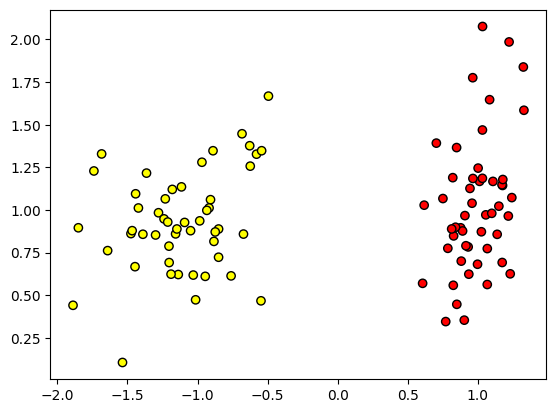

In [28]:
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_clusters_per_class=1, random_state=1)
scatter(X[:, 0], X[:, 1], c=y, cmap='spri', edgecolor='black')

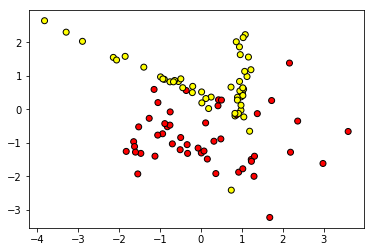

In [11]:
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_clusters_per_class=2, random_state=2)
scatter(X[:, 0], X[:, 1], c=y, cmap='autumn', edgecolor='black')

## Визуализация решающего правила

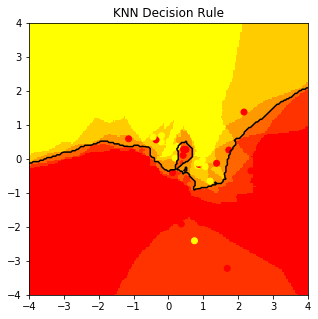

In [12]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X, y)

figure(figsize=(5, 5))
scatter(X[:, 0], X[:, 1], c=y, cmap='autumn')

xvals = linspace(-4, 4, 200)
yvals = linspace(-4, 4, 200)

xx, yy = np.meshgrid(xvals, yvals)
zz = np.reshape(model.predict_proba(c_[xx.ravel(), yy.ravel()])[:, 1], xx.shape)

# Цветной фон, соответствующий значению решающего правила
pcolormesh(xx, yy, zz, cmap='autumn', zorder=0)

# Линия уровня, соответствующая значению 0.5
contour(xx, yy, zz, levels=(0.5,), colors='k', linewidths=1.5, zorder=1)

xlim([-4, 4])
ylim([-4, 4])
_ = title('KNN Decision Rule')

## Реализация собственной модели для SciKit-Learn

В заданиях 2 и 3 требуется самостоятельно реализовать алгоритм обучения классификатора. Для того чтобы ваш алгоритм можно было использовать различными компонентами библиотеки SciKit-Learn (оценка качества, подбор параметров, композиции и т.д.) нужно всего лишь [реализовать интерфейс `BaseEstimator`](http://scikit-learn.org/stable/developers/#estimators).

In [13]:
from sklearn.base import BaseEstimator

class LinearSVM(BaseEstimator):
    def __init__(self, C, transform=None):
        self.C = C
        self.transform = transform
        
    def fit(self, X, y):
        """
        Функция обучения модели.
        """
        dim = X.shape[1]
        self.weights_ = empty(dim)
        self.bias_ = 0
        raise NotImplementedError() 
        
    def predict_proba(self, X):
        return (dot(X, self.weights_) + self.bias_).flatten()
            
    def predict(self, X):
        return sign(self.predict_proba(X))

In [ ]:
from sklearn.base import BaseEstimator

class DualSVM(BaseEstimator):
    def __init__(self, C, kernel=None):
        self.C = C
        self.kernel = kernel
        
    def fit(self, X, y):
        """
        Функция обучения модели.
        """
        self.dim = X.shape[1]
        self.N = X.shape[0]
        self.alpha_ = empty(self.N)
        self.bias_ = 0
        raise NotImplementedError() 
        
    def predict_proba(self, X):
        pass
            
    def predict(self, X):
        pass